In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hackathon-dataset/Copy-of-dataset_1_.csv


In [40]:

import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset from Kaggle
# Assuming your dataset is in a CSV file named 'your_dataset.csv'
# Adjust the file path accordingly
file_path = '/kaggle/input/hackathon-dataset/Copy-of-dataset_1_.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(df.head())




   CustomerID  AccountBalance   LastLogin  CustomerID.1           Name   Age  \
0      1001.0     9507.272060  2022-01-01        1001.0  Customer 1001  54.0   
1      1002.0     7408.704536  2022-01-02        1002.0  Customer 1002  35.0   
2      1003.0     1715.321989  2022-01-03        1003.0  Customer 1003  40.0   
3      1004.0     3101.509134  2022-01-04        1004.0  Customer 1004  30.0   
4      1005.0     5405.766914  2022-01-05        1005.0  Customer 1005  46.0   

        Address  TransactionID  FraudIndicator  CustomerID.2  ...  Category  \
0  Address 1001            1.0             0.0        1001.0  ...     Other   
1  Address 1002            2.0             0.0        1002.0  ...    Online   
2  Address 1003            3.0             0.0        1003.0  ...    Travel   
3  Address 1004            4.0             0.0        1004.0  ...    Travel   
4  Address 1005            5.0             0.0        1005.0  ...     Other   

   TransactionID.2 TransactionAmount Transac

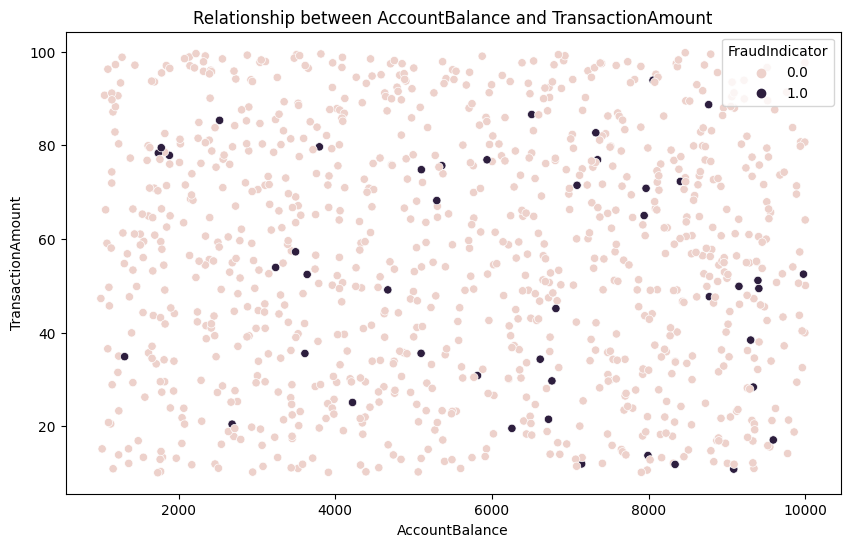

In [41]:
# Relationship between AccountBalance and TransactionAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AccountBalance', y='TransactionAmount', hue='FraudIndicator', data=df)
plt.title('Relationship between AccountBalance and TransactionAmount')
plt.show()

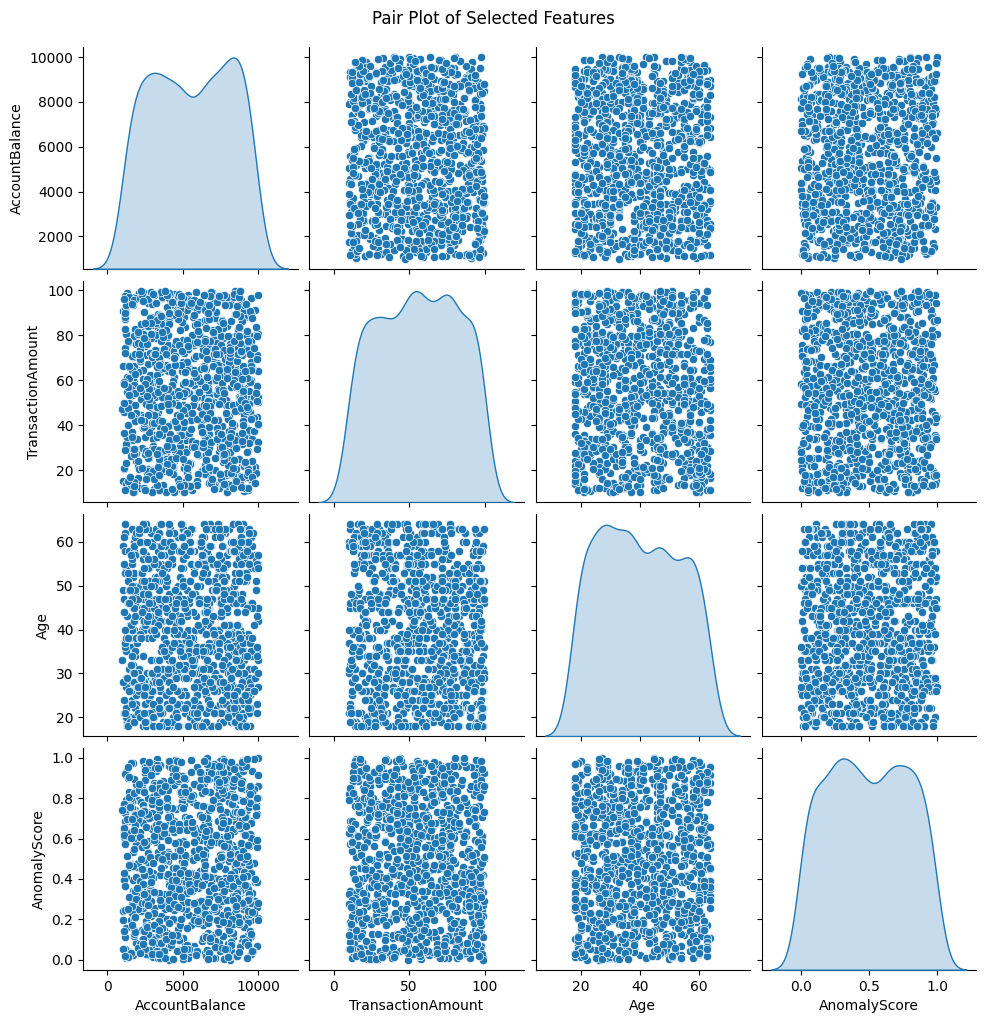

In [42]:
# Select relevant columns for the pair plot
selected_columns = ['AccountBalance', 'TransactionAmount', 'Age', 'AnomalyScore']

# Create a pair plot
sns.pairplot(df[selected_columns], markers=['o', 's'], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


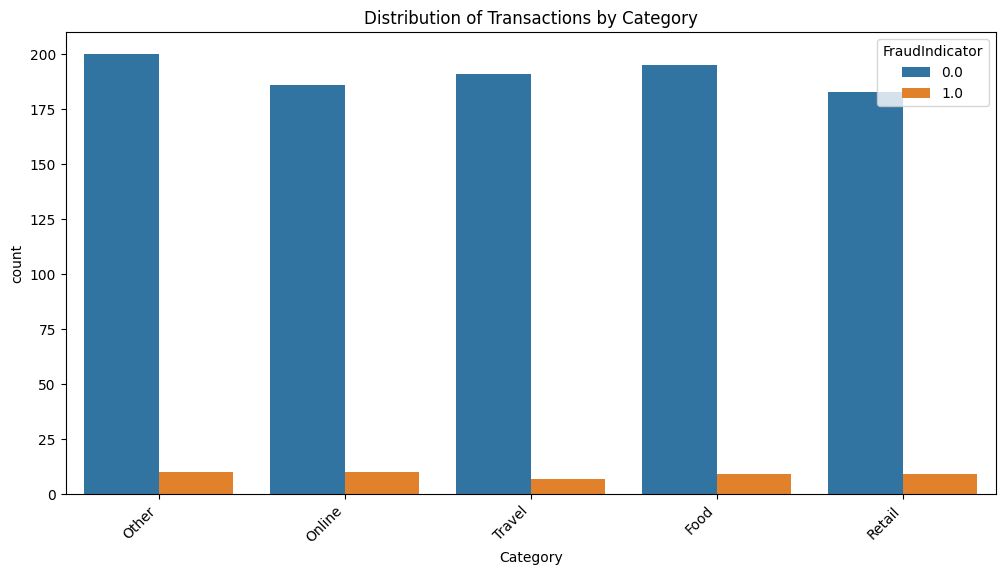

In [43]:
# Example for a categorical feature 'Category'
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', hue='FraudIndicator', data=df)
plt.title('Distribution of Transactions by Category')
plt.xticks(rotation=45, ha='right')
plt.show()


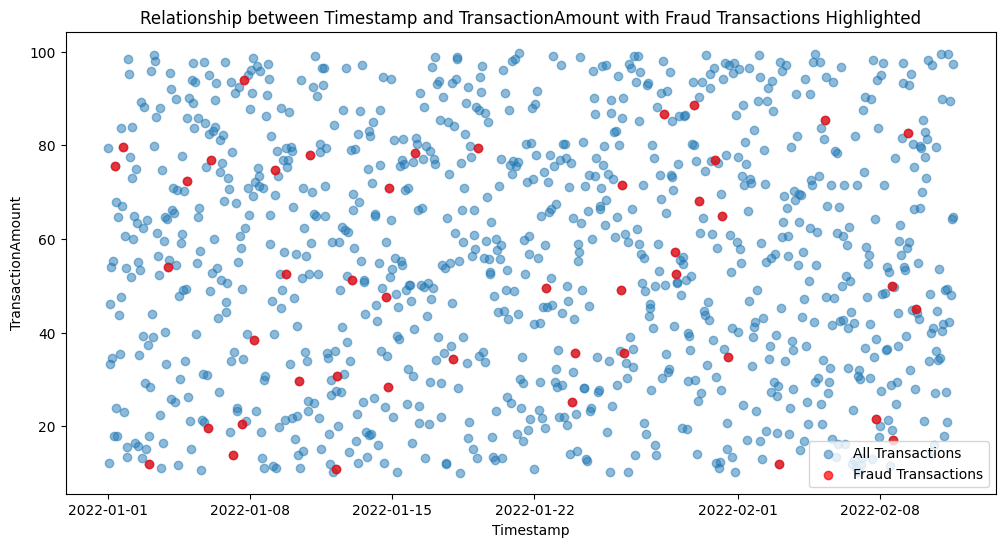

In [45]:
# Assuming you have a timestamp column named 'Timestamp'
df['Timestamp'] = pd.to_datetime(df['Timestamp'] , format='%d-%m-%Y %H:%M')

# Filter data for fraud transactions
fraudulent_transactions = df[df['FraudIndicator'] == 1]

# Scatter plot for all transactions
plt.figure(figsize=(12, 6))
plt.scatter(df['Timestamp'], df['TransactionAmount'], label='All Transactions', alpha=0.5)

# Scatter plot for fraud transactions
plt.scatter(fraudulent_transactions['Timestamp'], fraudulent_transactions['TransactionAmount'], color='red', label='Fraud Transactions', alpha=0.7)

plt.title('Relationship between Timestamp and TransactionAmount with Fraud Transactions Highlighted')
plt.xlabel('Timestamp')
plt.ylabel('TransactionAmount')
plt.legend()
plt.show()


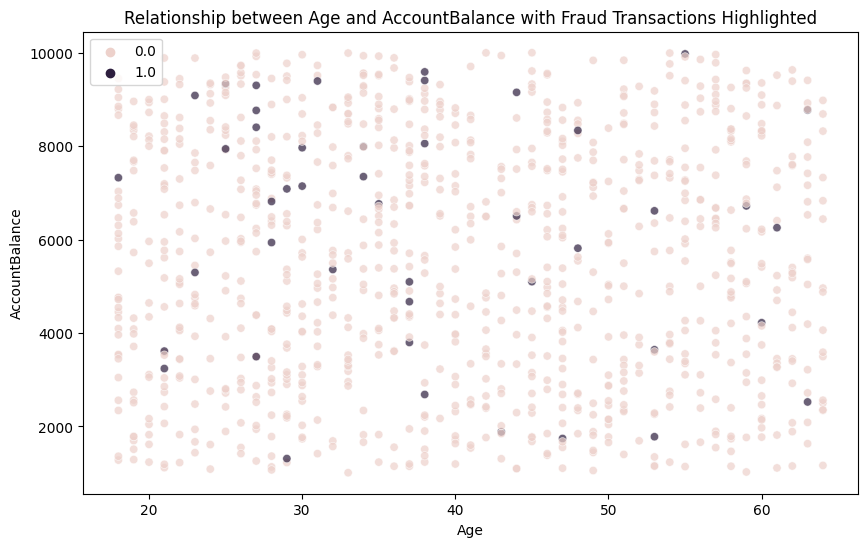

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='AccountBalance', hue='FraudIndicator', data=df, alpha=0.7)
plt.title('Relationship between Age and AccountBalance with Fraud Transactions Highlighted')
plt.xlabel('Age')
plt.ylabel('AccountBalance')
plt.legend()
plt.show()


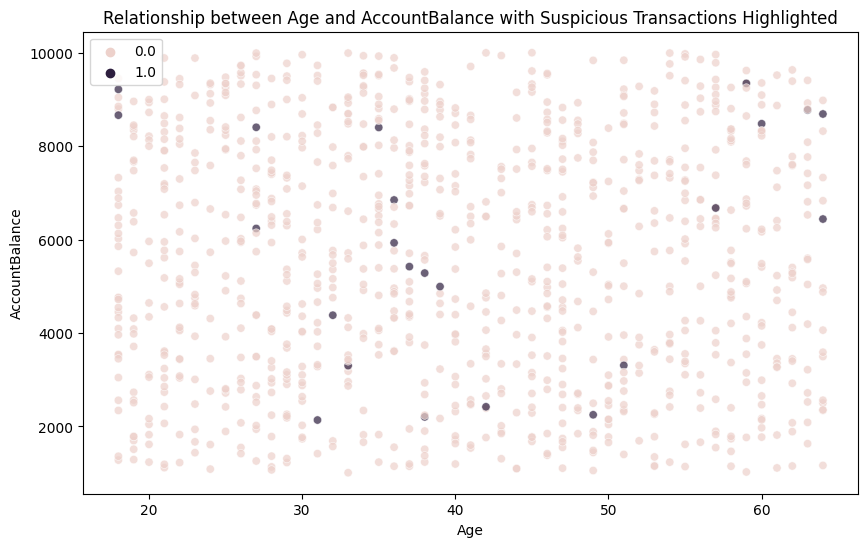

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='AccountBalance', hue='SuspiciousFlag', data=df, alpha=0.7)
plt.title('Relationship between Age and AccountBalance with Suspicious Transactions Highlighted')
plt.xlabel('Age')
plt.ylabel('AccountBalance')
plt.legend()
plt.show()


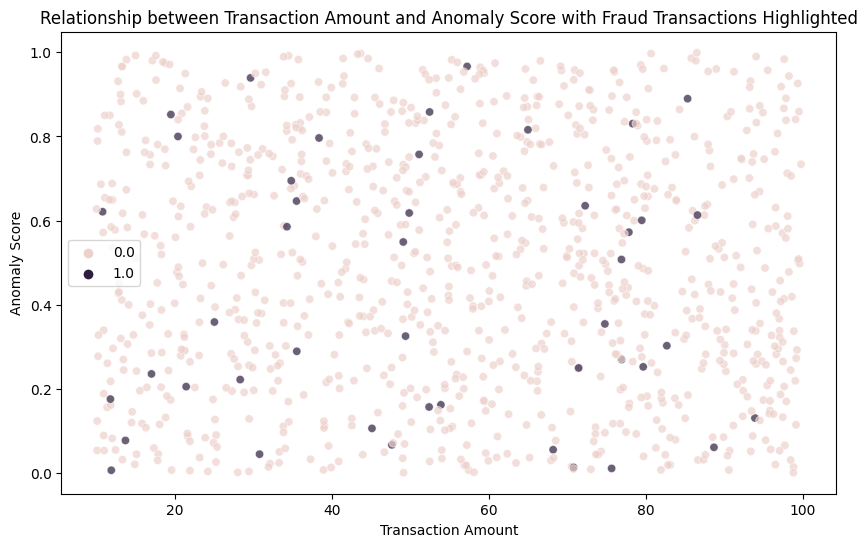

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TransactionAmount', y='AnomalyScore', hue='FraudIndicator', data=df, alpha=0.7)
plt.title('Relationship between Transaction Amount and Anomaly Score with Fraud Transactions Highlighted')
plt.xlabel('Transaction Amount')
plt.ylabel('Anomaly Score')
plt.legend()
plt.show()


                   TransactionAmount  AnomalyScore  FraudIndicator
TransactionAmount           1.000000     -0.037820       -0.033456
AnomalyScore               -0.037820      1.000000       -0.048198
FraudIndicator             -0.033456     -0.048198        1.000000


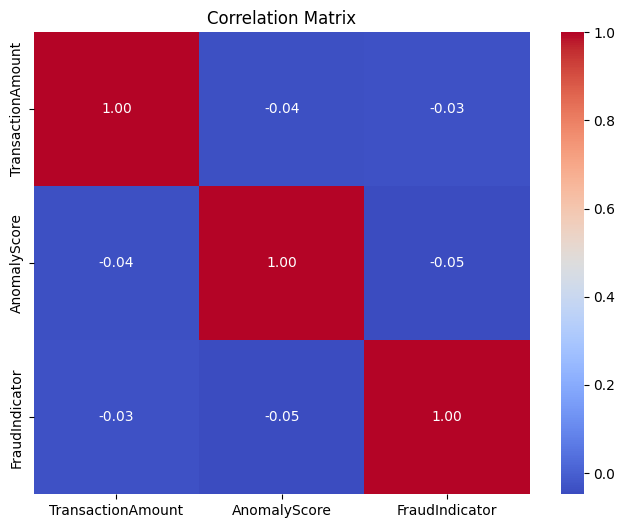

In [53]:
# Calculate correlation coefficients
correlation_matrix = df[['TransactionAmount', 'AnomalyScore', 'FraudIndicator']].corr()

# Display the correlation matrix
print(correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [54]:
# Group the data by 'Category' and calculate mean account balance and fraud percentage
category_summary = df.groupby('Category').agg({'AccountBalance': 'mean', 'FraudIndicator': 'mean'}).reset_index()
category_summary['FraudPercentage'] = category_summary['FraudIndicator'] * 100

# Sort the table by fraud percentage in descending order
category_summary = category_summary.sort_values(by='FraudPercentage', ascending=False)

# Display the category summary
print(category_summary)


  Category  AccountBalance  FraudIndicator  FraudPercentage
1   Online     5431.697535        0.051020         5.102041
2    Other     5739.533887        0.047619         4.761905
3   Retail     5638.956436        0.046875         4.687500
0     Food     5527.054030        0.044118         4.411765
4   Travel     5444.213166        0.035354         3.535354


In [56]:
# Group the data by 'Age' and 'SuspiciousFlag' and calculate mean account balance
age_summary = df.groupby(['Age', 'SuspiciousFlag']).agg({'AccountBalance': 'mean'}).reset_index()

# Display the summary statistics
print(age_summary)


     Age  SuspiciousFlag  AccountBalance
0   18.0             0.0     5230.690350
1   18.0             1.0     8939.550412
2   19.0             0.0     5037.106047
3   20.0             0.0     5087.861771
4   21.0             0.0     5653.485785
..   ...             ...             ...
60  62.0             0.0     5094.562721
61  63.0             0.0     5748.416739
62  63.0             1.0     8773.956940
63  64.0             0.0     4526.791544
64  64.0             1.0     7564.091251

[65 rows x 3 columns]


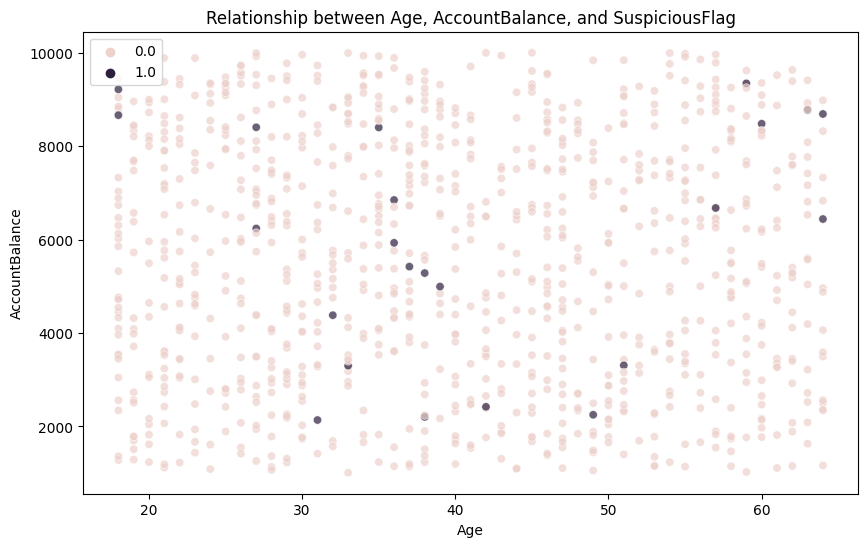

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='AccountBalance', hue='SuspiciousFlag', data=df, alpha=0.7)
plt.title('Relationship between Age, AccountBalance, and SuspiciousFlag')
plt.xlabel('Age')
plt.ylabel('AccountBalance')
plt.legend()
plt.show()


In [64]:
import plotly.express as px

# Select relevant columns
selected_columns = ['Category', 'TransactionAmount', 'Timestamp', 'FraudIndicator', 'AccountBalance']

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    df[selected_columns],
    x='TransactionAmount',
    y='Timestamp',
    z='AccountBalance',
    color='FraudIndicator',
    symbol='Category',
    size_max=10,
    opacity=0.7,
    labels={'Category': 'Transaction Category'},
    title='3D Scatter Plot of Transaction Amount, Timestamp, and Account Balance',
)

# Set axis labels
fig.update_layout(scene=dict(xaxis_title='Transaction Amount', yaxis_title='Timestamp', zaxis_title='Account Balance'))

fig.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



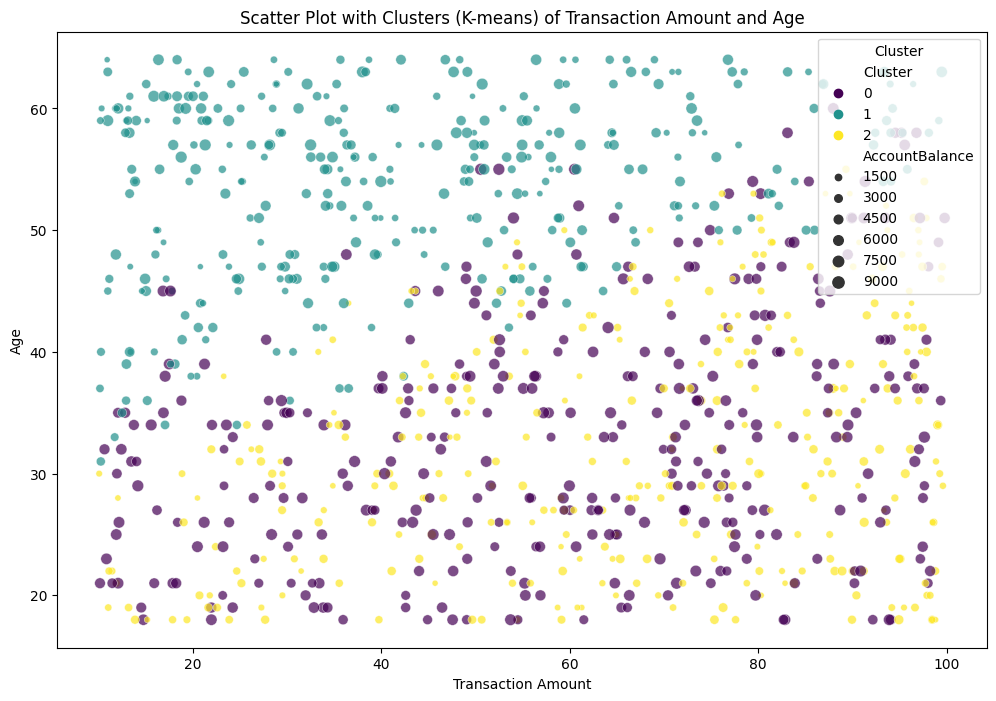

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Select relevant columns
selected_columns = ['TransactionAmount', 'Age', 'AccountBalance']
df.dropna(inplace=True)
# Standardize the data
scaler = StandardScaler()
df_std = scaler.fit_transform(df[selected_columns])

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_std)

# Create a scatter plot with clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TransactionAmount', y='Age', hue='Cluster', size='AccountBalance', data=df, palette='viridis', alpha=0.7)
plt.title('Scatter Plot with Clusters (K-means) of Transaction Amount and Age')
plt.xlabel('Transaction Amount')
plt.ylabel('Age')
plt.legend(title='Cluster')
plt.show()


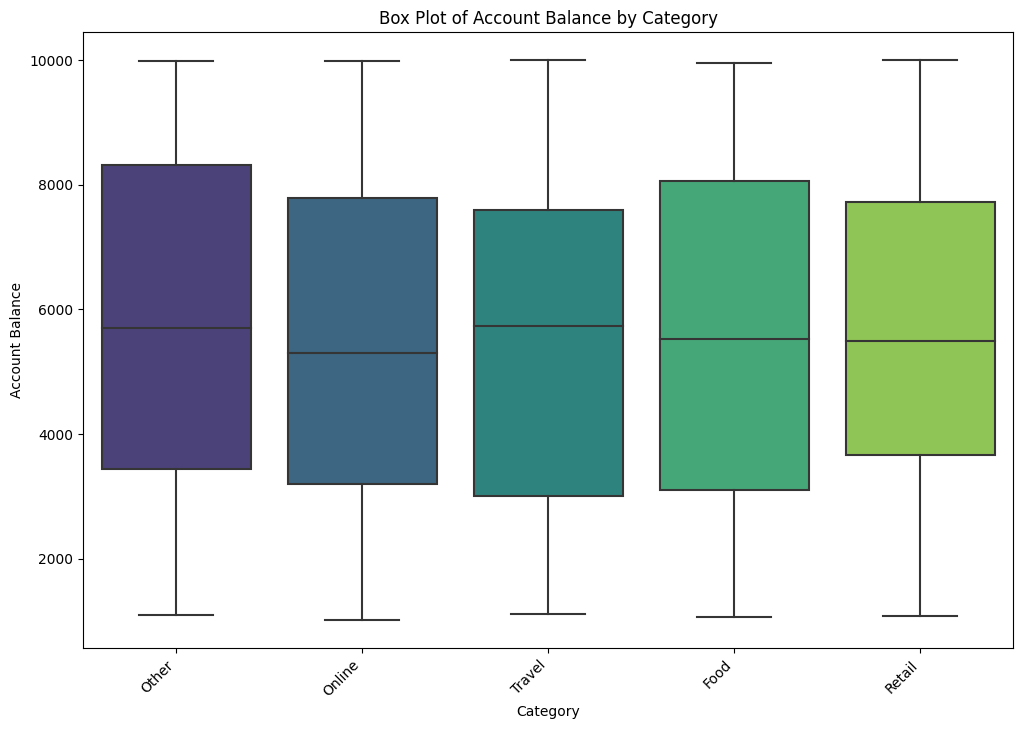

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='AccountBalance', data=df, palette='viridis')
plt.title('Box Plot of Account Balance by Category')
plt.xlabel('Category')
plt.ylabel('Account Balance')
plt.xticks(rotation=45, ha='right')
plt.show()


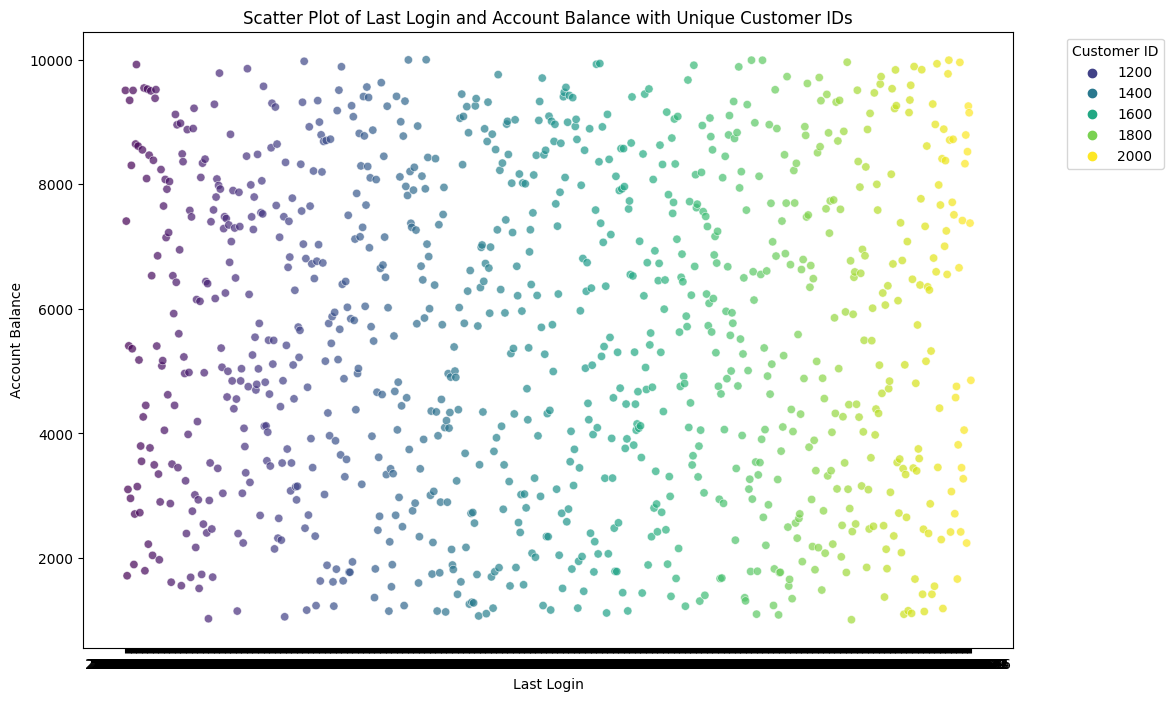

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with color-coded unique CustomerID values
plt.figure(figsize=(12, 8))
sns.scatterplot(x='LastLogin', y='AccountBalance', hue='CustomerID', data=df, palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Last Login and Account Balance with Unique Customer IDs')
plt.xlabel('Last Login')
plt.ylabel('Account Balance')
plt.legend(title='Customer ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [71]:

# Check if LastLogin and CustomerID are unique
unique_login_customerid = df[['LastLogin', 'CustomerID']].nunique()
print("Unique LastLogin values:", unique_login_customerid['LastLogin'])
print("Unique CustomerID values:", unique_login_customerid['CustomerID'])

# Check for duplicates
duplicate_rows = df[df.duplicated(subset=['LastLogin', 'CustomerID'], keep=False)]
print("Number of duplicate rows:", len(duplicate_rows))

# Calculate summary statistics
summary_stats = df.groupby(['LastLogin', 'CustomerID']).agg({'AccountBalance': ['mean', 'min', 'max', 'std', 'count']}).reset_index()

# Display the summary statistics
print(summary_stats)


Unique LastLogin values: 999
Unique CustomerID values: 999
Number of duplicate rows: 0
      LastLogin CustomerID AccountBalance                                    
                                     mean          min          max std count
0    2022-01-01     1001.0    9507.272060  9507.272060  9507.272060 NaN     1
1    2022-01-02     1002.0    7408.704536  7408.704536  7408.704536 NaN     1
2    2022-01-03     1003.0    1715.321989  1715.321989  1715.321989 NaN     1
3    2022-01-04     1004.0    3101.509134  3101.509134  3101.509134 NaN     1
4    2022-01-05     1005.0    5405.766914  5405.766914  5405.766914 NaN     1
..          ...        ...            ...          ...          ...  ..   ...
994  2024-09-22     1996.0    8523.485163  8523.485163  8523.485163 NaN     1
995  2024-09-23     1997.0    9255.451757  9255.451757  9255.451757 NaN     1
996  2024-09-24     1998.0    9148.652759  9148.652759  9148.652759 NaN     1
997  2024-09-25     1999.0    7376.854107  7376.854107 

          Location Category  FraudCount  TotalCount  FraudPercentage
0    Location 2001    Other         0.0           1              0.0
1    Location 2002   Online         0.0           1              0.0
2    Location 2003   Travel         0.0           1              0.0
3    Location 2004   Travel         0.0           1              0.0
4    Location 2005    Other         0.0           1              0.0
..             ...      ...         ...         ...              ...
994  Location 2996     Food         0.0           1              0.0
995  Location 2997   Retail         0.0           1              0.0
996  Location 2998     Food         0.0           1              0.0
997  Location 2999   Travel         0.0           1              0.0
998  Location 3000    Other         0.0           1              0.0

[999 rows x 5 columns]


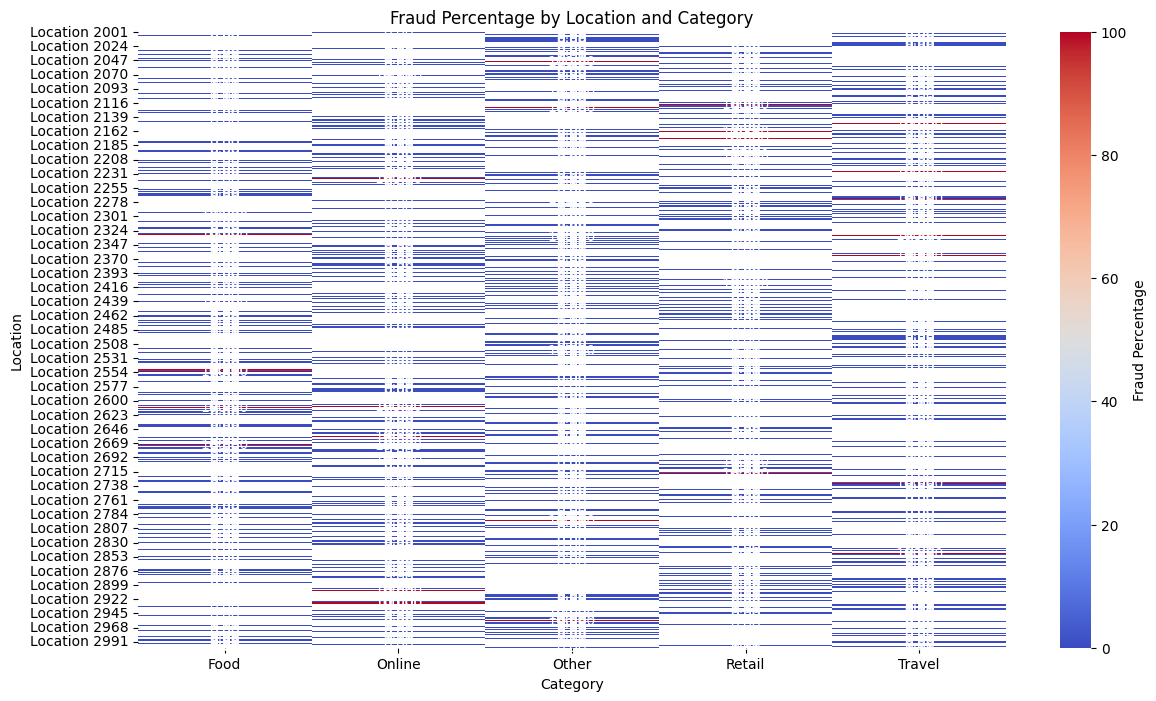

In [75]:
# Group by Location, Category, and calculate fraud statistics
fraud_stats = df.groupby(['Location', 'Category']).agg({'FraudIndicator': ['sum', 'count']}).reset_index()
fraud_stats.columns = ['Location', 'Category', 'FraudCount', 'TotalCount']
fraud_stats['FraudPercentage'] = (fraud_stats['FraudCount'] / fraud_stats['TotalCount']) * 100

# Display the summary statistics
print(fraud_stats)

# Create a heatmap
plt.figure(figsize=(14, 8))
heatmap_data = fraud_stats.pivot_table(index='Location', columns='Category', values='FraudPercentage', aggfunc='first')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Fraud Percentage'})
plt.title('Fraud Percentage by Location and Category')
plt.show()


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is your dataframe with 'Location', 'Category', 'FraudIndicator', and other relevant features

# Preprocess the data (you may need to encode categorical variables)
X = pd.get_dummies(df[['Location', 'Category']], columns=['Location', 'Category'], drop_first=True)
y = df['FraudIndicator']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.975
Confusion Matrix:
[[195   0]
 [  5   0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       195
         1.0       0.00      0.00      0.00         5

    accuracy                           0.97       200
   macro avg       0.49      0.50      0.49       200
weighted avg       0.95      0.97      0.96       200



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



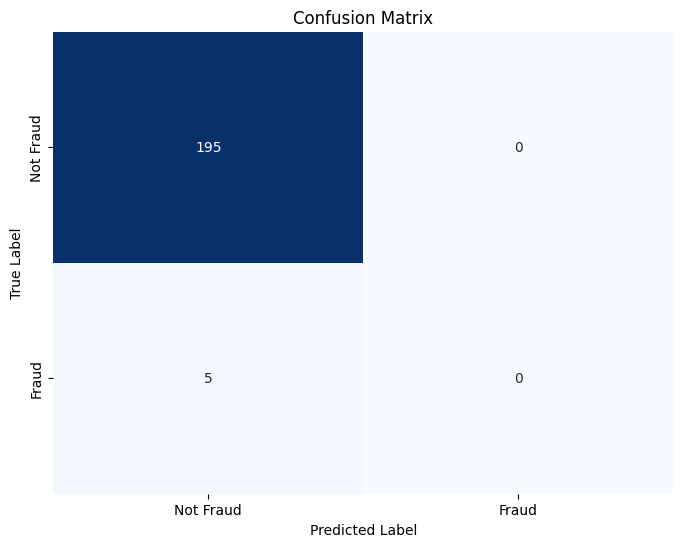

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, model.predict(X_test))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
